# Insights into Healthcare Costs: Identifying Key Drivers

## Data Source Information

## Dataset: Healthcare Insurance
## Data Source: Kaggle

This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

## Attributes
- Age: The insured person's age.
- Sex: Gender (male or female) of the insured.
- BMI (Body Mass Index): A measure of body fat based on height and weight.
- Children: The number of dependents covered.
- Smoker: Whether the insured is a smoker (yes or no).
- Region: The geographic area of coverage.
- Charges: The medical insurance costs incurred by the insured person.


# Introduction

With over a decade of experience working closely with private insurance companies in the healthcare sector, I have witnessed firsthand the significant impact that various health conditions and lifestyle factors can have on medical expenses. Particularly in the Imaging Department, where I have encountered a lot of Cardiac patients. This experience has fueled my curiosity to delve deeper into the intricate relationship between individual attributes and insurance costs.
The motivation behind this project stems from a fundamental concern: how can we better understand and quantify the factors that contribute to the rising costs of healthcare? By uncovering the key drivers of medical expenses, we can empower insurance providers to develop more accurate pricing models, tailor their offerings to specific risk profiles, and ultimately promote a more sustainable and equitable healthcare system.
Furthermore, this analysis holds the potential to inform public health like the NHS initiatives and preventive care strategies. By identifying the significant contributors to increased medical costs, such as obesity, smoking, or age-related conditions, we can prioritize targeted interventions and educational campaigns. These efforts not only benefit individuals by improving their overall well-being but also have the potential to alleviate the financial burden on insurance companies and the healthcare system as a whole.

## Objective
The objective of this analysis is to understand the factors that influence medical insurance costs and to develop predictive models for estimating healthcare expenses. My analysis will be focused on both the descriptive and diagnostic aspect, leveraging individual data to build models that can forecast or estimate future healthcare expenditures, rather than solely describing past trends or prescribing actions.

## Scope 
This project includes loading and preprocessing the data, conducting exploratory data analysis (EDA), visualizing the data, performing correlation analysis, and summarizing the findings.

In the course of this analysis, I have also leveraged the collective knowledge and resources available on platforms like Stack Overflow and GitHub where I found helpful code snippets and insights such as annotations, legends and highlighting significant differences from the programming community.

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data & Initial Data Inspection

In [14]:
# Reading Data into DataFrame

# Load dataset
df = pd.read_csv('insurance.csv')

# Initial inspection
df.head()

# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Checking for Null Values and Data Types

In [11]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Descriptive Statistics

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualizations

# Histogram - Distribution of Charges (with annotations)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


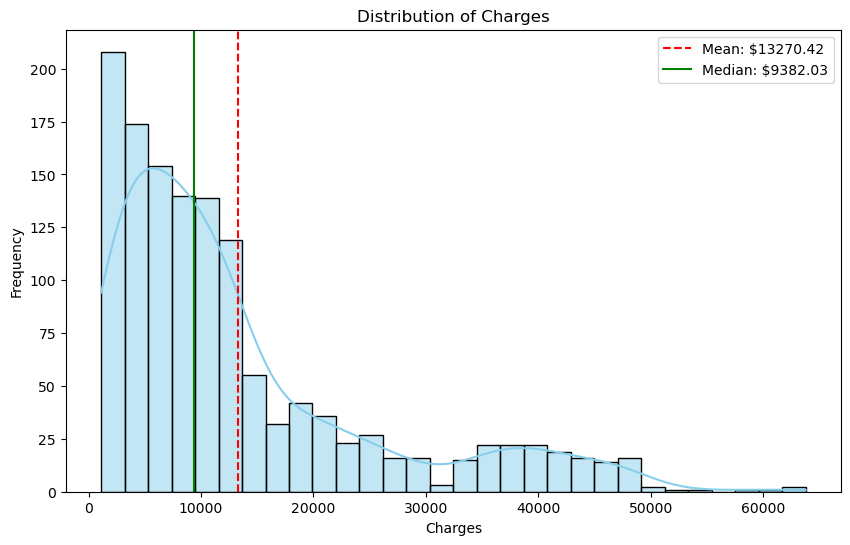

In [44]:
# Viz 1: Distribution of Charges with Annotations
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Add annotation for mean and median (sourcecode from stack overflow)
mean_charge = df['charges'].mean()
median_charge = df['charges'].median()

# colours r=red g=green lines -- dashed - solid, 2f=round to 2 decimal places 
plt.axvline(mean_charge, color='r', linestyle='--', label=f'Mean: ${mean_charge:.2f}')
plt.axvline(median_charge, color='g', linestyle='-', label=f'Median: ${median_charge:.2f}')

plt.legend()
# Save the figure as a PNG file
plt.savefig('insurance_distribution_of_charges.png', dpi=300, bbox_inches='tight')
plt.show()

## Objective

The objective of this visualization is to understand the distribution of insurance charges among the insured individuals. It helps to identify the range, central tendency, and spread of the charges. Additionally, it can highlight any potential outliers or skewness in the data.

## Explanation

This histogram is used to visualize the distribution of the charges variable. The x-axis represents the insurance charges, while the y-axis represents the frequency of individuals within each charge range. A kernel density estimate (KDE) line is overlaid on the histogram to provide a smoothed estimate of the distribution.

## Findings

- Shape of Distribution: The distribution of charges is right-skewed, indicating that most individuals have lower insurance costs, with fewer individuals incurring very high charges.
- Central Tendency: The mean charge is indicated by the red dashed line, and the median charge is indicated by the green solid line. The mean charge is higher than the median charge, further confirming the right-skewed nature of the data.
- Range of Charges: The majority of charges are concentrated between $0 and $14,000, with a long tail extending towards higher values.
- Potential Outliers:There are a few extremely high charges that can be considered outliers. These outliers could be due to significant medical events or chronic conditions requiring expensive treatments.

## Implications 

The right-skewed distribution suggests that while most individuals have relatively low medical costs, a small number of individuals incur very high expenses. This can be important for insurance companies to consider when setting premiums and managing risk.

# Correlation Matrix Heat Map - Correlations between continuous variables

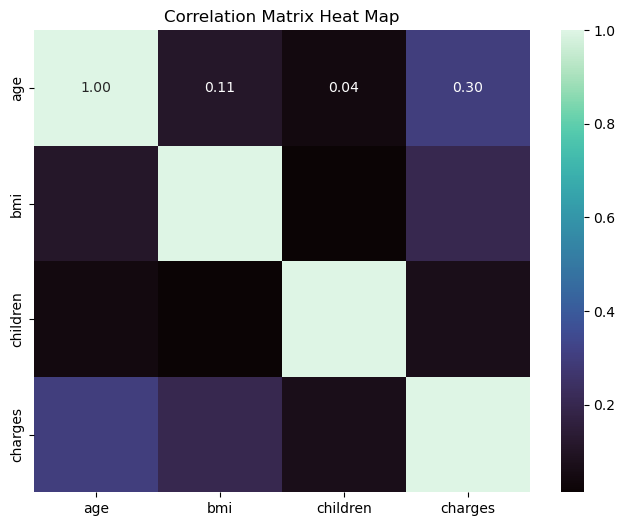

In [42]:
# Viz 4
#Correlations between continuous variables (without sex, smoker and region)
plt.figure(figsize = (8, 6))
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), cmap = 'mako', fmt='.2f', annot = True)
plt.title('Correlation Matrix Heat Map')
plt.savefig('insurance_correlation_matrix_heat_map.png', dpi=300, bbox_inches='tight')
plt.show()

## Objectives

The objective of this visualization is to display the correlations between continous variables (excluding sex, smoker, and region) using heatmap.
The aim is to identify and significant linear relationships between the variables and to assess the strenght of these relationships.

## Explanation

This visualization serves as a valuable tool for understanding the interplay between the continuous variables and identifying any potential patterns or associations among them.

## Findings

- In summary, all the correlation coefficients are not more than 0.3, which suggests weak linear relationships between the variables.

# Box Plot - Charges by Age Group (with annotations)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_1413/4141898745.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('age_group')['charges'].median()


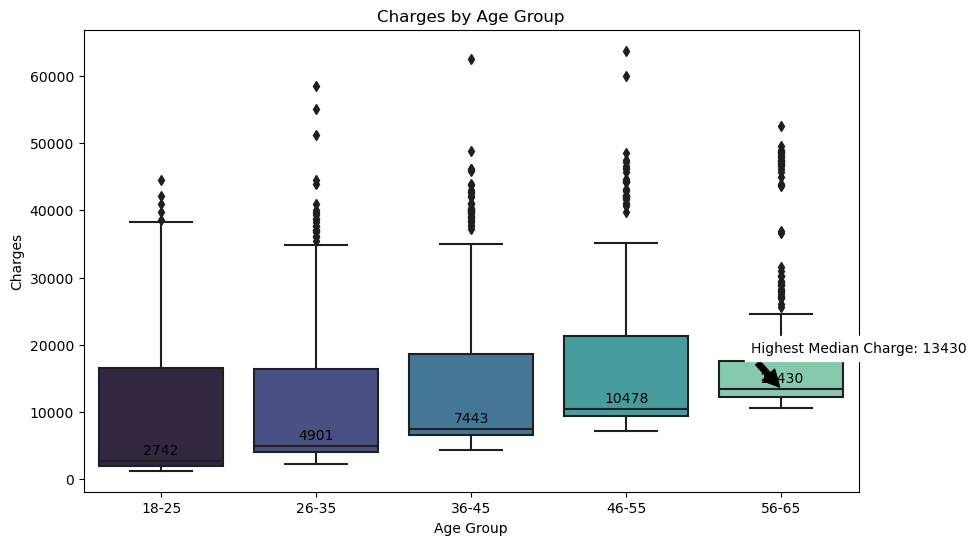

In [46]:
#Viz 5
# Age Group Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('insurance.csv')

# Create age groups by using bins + labels
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Plot the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='age_group', y='charges', data=df, palette=("mako"))
plt.title('Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Charges')

# Annotate the median charges for each age group (sourcecode from stack overflow)
medians = df.groupby('age_group')['charges'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 1000, f'{median:.0f}', ha='center', color='black')

# Highlighting the highest median charge (sourcecode from stack overflow)
max_median_age_group = medians.idxmax()
max_median_value = medians.max()
max_median_position = list(df['age_group'].cat.categories).index(max_median_age_group)

#max_median_age_group stores the index (age group) with the maximum median charge from the medians Series.
#max_median_value stores the actual maximum median charge value.
#max_median_position finds the position (index) of the max_median_age_group in the list of unique age group categories from the DataFrame
#Adjust positioning of the arrow and the text by changing values of xy() and xytext()
ax.annotate(f'Highest Median Charge: {max_median_value:.0f}', 
            xy=(max_median_position, max_median_value), 
            xytext=(max_median_position + 0.5, max_median_value + 5000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center', va='bottom', color='black', backgroundcolor='white')
# Save the figure as a PNG file
plt.savefig('insurance_charges_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

## Objectives

The objective of this box plot visualization is to analyze and compare the distribution of insurance charges across different age groups. By displaying the median charges for each age group, the visualization aims to provide insights into the typical insurance costs associated with individuals in various age brackets.

## Explanation

For this, I've created age groups and labeled them as follows: 18-25, 26-35, 36-45, 46-55, and 56-65
With this, the box plot's ability to visually represent the distribution of charges across age groups makes it an effective tool for identifying potential trends, outliers, and areas that may require further investigation or targeted startegies.

## Findings

- Median Charges: the median charges for each age group are displayed, providing a clear indication of the typical insurance cost for individuals in each age bracket.
- Highest Median Charge: the age group with the highest median charge is highlighted. For example, 56-65 age group has the highest median charge, this could suggest that individuals in this age bracket incur higher healthcare costs, possibly due to increased health issues that come with age.

## Implications
-  This information can guide insurance companies in risk assessment, pricing strategies, targeted health interventions, resource allocation, and product development tailored to different age demographics.


# Scatter Plots - Charges by Age and BMI (with annotations)

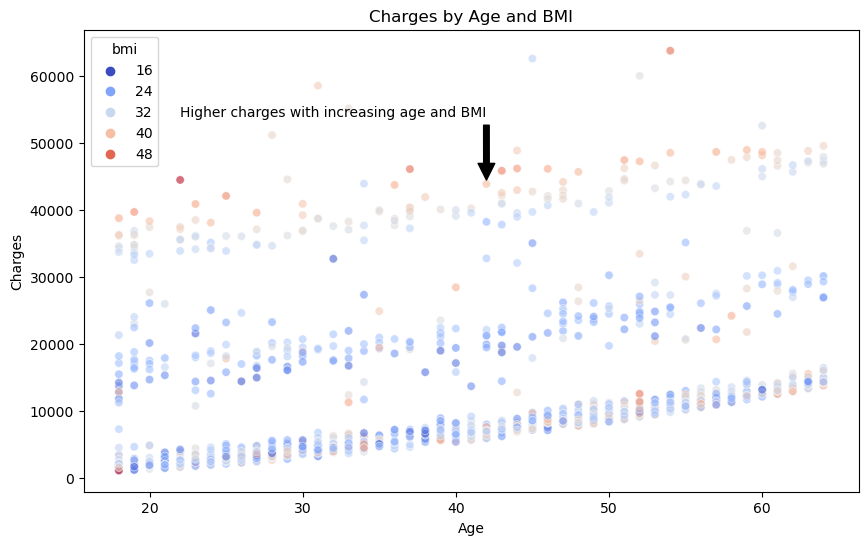

In [16]:
#Viz 2
#alpha=adjust transparency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='bmi', palette='coolwarm', alpha=0.6)
plt.title('Charges by Age and BMI')
plt.xlabel('Age')
plt.ylabel('Charges')

# Highlight a trend or pattern (sourcecode from stack overflow)
# Position the arrows by adjusting xy=() and the text by adjusting xytext=()
plt.annotate('Higher charges with increasing age and BMI', xy=(42, 44000), xytext=(22, 54000),
             arrowprops=dict(facecolor='black', shrink=0.05))
# Save the figure as a PNG file
plt.savefig('insurance_charges_by_age_and_BMI.png', dpi=300, bbox_inches='tight')
plt.show()
# the trend is clearly visible so I decided not to add a trend line

## Objective

The objective of this visualization is to explore the relationship between age, BMI, and insurance charges. It helps to identify how charges vary with age and BMI, and whether there are any noticeable patterns or trends.

## Explanation

A scatter plot is used to visualize the relationship between age (x-axis) and charges (y-axis). Each point represents an individual, with the color of the points indicating their BMI. This helps to see if there is any correlation between age, BMI, and insurance charges.

## Findings

- Age and Charges: There is a general trend of increasing charges with age, indicating that older individuals tend to incur higher medical costs. This is likely due to age-related health issues and increased medical care needs.
- BMI and Charges: The color gradient representing BMI shows that higher BMI values are associated with higher charges. This suggests that individuals with higher BMI, who may be overweight or obese, tend to have higher medical expenses, possibly due to obesity-related health issues.
- Combined effect: The scatter plot shows a combined effect of age and BMI on charges. Older individuals with higher BMI tend to incur the highest charges, indicating a compounded effect of these factors on medical costs.
- Variability: There is significant variability in charges within each age group and BMI category. While the general trend shows higher charges with increasing age and BMI, there are also individuals with low charges across all ages and BMI levels, indicating other factors at play.

## Implications
- Understanding the relationship between age, BMI, and charges can help insurance companies in designing personalized premium plans. For instance, older individuals and those with higher BMI might be charged higher premiums due to the increased likelihood of higher medical costs.
- Public health initiatives focused on reducing obesity could help lower overall medical costs, benefiting both individuals and insurance providers.

By examining these visualizations, we gain valuable insights into how different personal attributes, such as age and BMI, influence medical insurance costs, helping to inform better decision-making for both policyholders and insurers

# Box Plot - Charges by Regions and Smoking Status (with annotations)

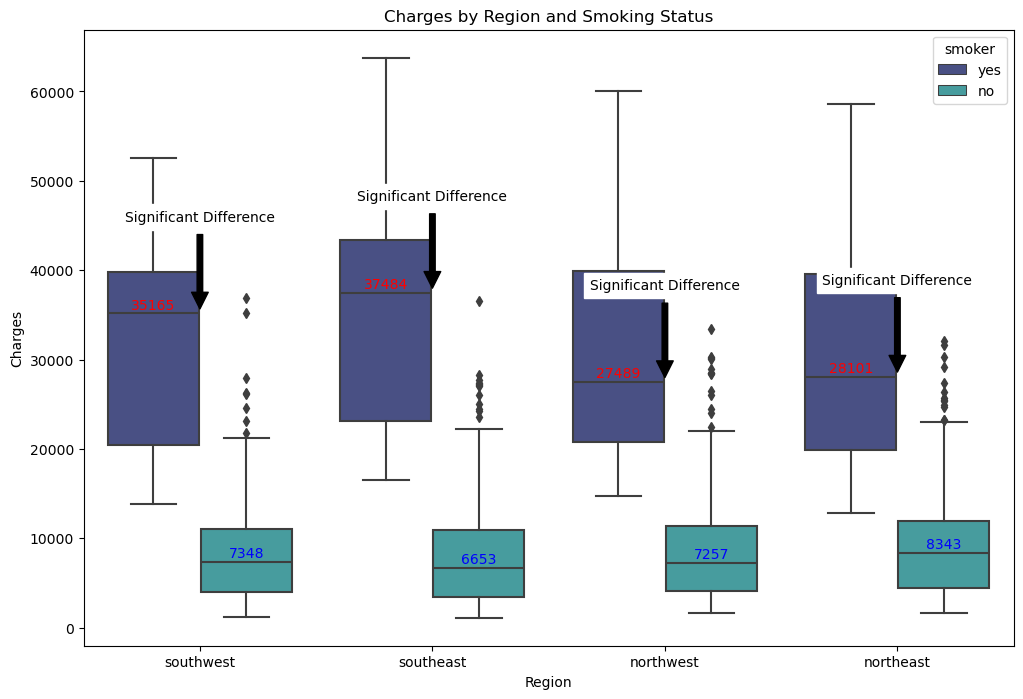

In [45]:
#Viz 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('insurance.csv')

# Create the boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='region', y='charges', hue='smoker', data=df, palette=("mako"))
plt.title('Charges by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Charges')

# Annotate median charges for each region and smoking status (sourcecode from stack overflow)
medians_smoker = df[df['smoker'] == 'yes'].groupby('region')['charges'].median()
medians_non_smoker = df[df['smoker'] == 'no'].groupby('region')['charges'].median()

for i, region in enumerate(df['region'].unique()):
    # Median charges for smokers
    median_smoker = medians_smoker.get(region, None)
    if median_smoker is not None:
        ax.text(i - 0.2, median_smoker + 500, f'{median_smoker:.0f}', ha='center', color='red')
# enumerate(df['region'].unique()) generates an index (i) and the corresponding unique region value.
# For smokers:
# median_smoker = medians_smoker.get(region, None) retrieves the median charge for smokers in the current region, or None if the region is not present.
# Median charges for non-smokers
#0f=0 decimal place
    median_non_smoker = medians_non_smoker.get(region, None)
    if median_non_smoker is not None:
        ax.text(i + 0.2, median_non_smoker + 500, f'{median_non_smoker:.0f}', ha='center', color='blue')
# The same process is repeated for non-smokers, but with the x-coordinate offset to the right (i + 0.2) and the color as blue (color='blue').
# ha means centre or horizontal alignment of the text
# va means bottom  or vertical alignment of the text
# As for above, it iterates over the unique regions again, retrieving the median charges for smokers and non-smokers.
# Highlight regions with significant differences
for i, region in enumerate(df['region'].unique()):
    median_smoker = medians_smoker.get(region, None)
    median_non_smoker = medians_non_smoker.get(region, None)
    
    if median_smoker and median_non_smoker:
        if abs(median_smoker - median_non_smoker) > 5000:  # Threshold for significant difference
            ax.annotate(f'Significant Difference',
                        xy=(i, max(median_smoker, median_non_smoker)), 
                        xytext=(i, max(median_smoker, median_non_smoker) + 10000),
                        arrowprops=dict(facecolor='black', shrink=0.05),
                        ha='center', va='bottom', color='black', backgroundcolor='white')
# Save the figure as a PNG file
plt.savefig('charges_by_region_and_smoking_status.png', dpi=300, bbox_inches='tight')
plt.show()

## Objective

The objective is to analyze and compare insurance charges based on regional variations and smoking status.

## Explanation

The boxplot is used to facilitate the comparison of insurance charges by region and smoking status, with a focus on identifying regional differences in charges between smokers and non-smokers. The aim is to highlight the potential impact of smoking on healthcare costs in different regions, providing valuable insights for insurance companies to consider for more accurate pricing or targeted health interventions.

## Findings
- Regional Comparisons: Observations reveal that smokers tend to have higher median charges than non-smokers, with notable regional variations.
- Significant Difference: Certain regions show a substantial difference in charges between smokers and non-smokers, this might indicate a higher healthcare cost burden for smokers in those regions. 

## Implications
- Insurance companies could use this information for more accurate pricing or targeted health interventions.

# Pair Plot - Pair Plot of Numerical Variables by Smoker Status

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

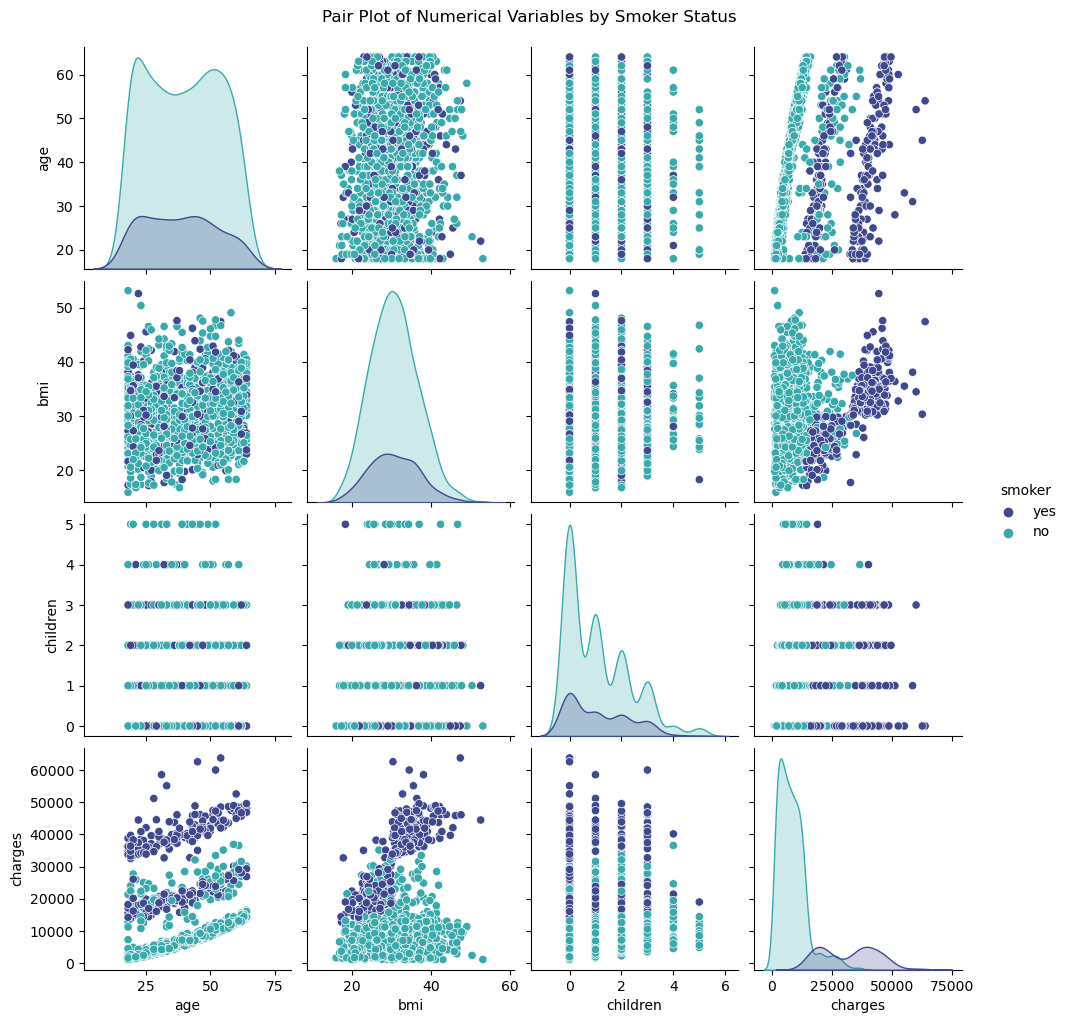

In [48]:
# Viz 6
sns.pairplot(df[['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']], hue='smoker', palette=("mako"))
plt.suptitle('Pair Plot of Numerical Variables by Smoker Status', y=1.02)
# Save the figure as a PNG file
plt.savefig('insurance_smoker_pair_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Objectives

The objective of this visualization is to display the pairwise relationships between numerical variables in the dataset, with the ability to color-code the data points based on the smoker status (smoker or non-smoker)

## Explanation

The resulting pair plot will display a grid of scatter plots, with each plot showing the relationship between two variables. The data points will be color-coded based on the smoker status, allowing for easy visual identification of potential differences or patterns between smokers and non-smokers

## Findings

The pair plot visualization unveils a compelling pattern: individuals who are smokers tend to incure significantly higher insurance charges compared to their non-smoking counterparts.

## Implications

By understanding the relationship between smoking and higher insurance charges, stakeholders in the healthcare industry can make informed decisions and implement strategies to mitigate the associated risks and costs, while promoting healthier lifestyles and preventive care measures.

# Scatter Plot - Interaction between BMI and Smoking Status on Charges (with annotations)

<Figure size 1000x600 with 0 Axes>

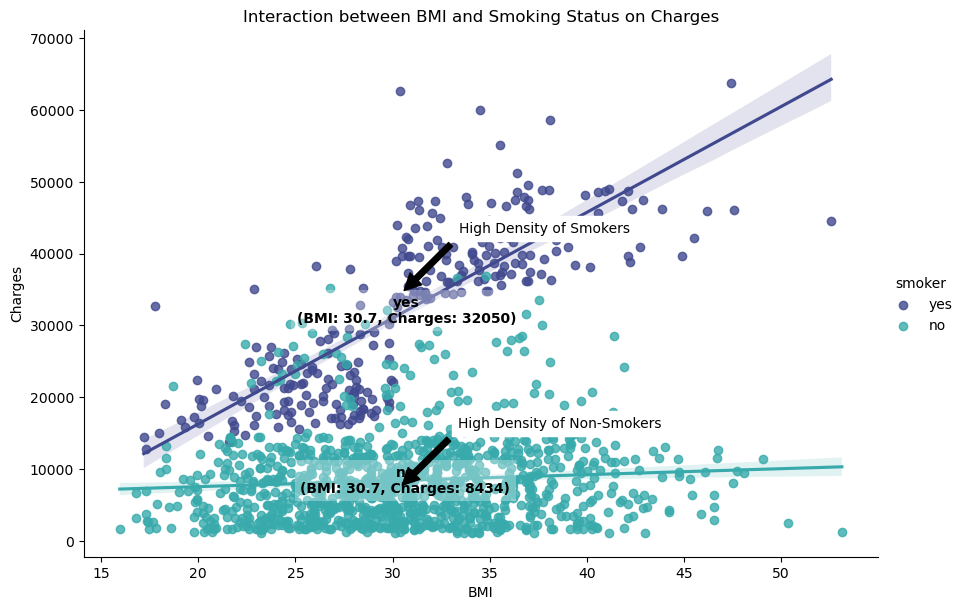

In [49]:
#Viz 7
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('insurance.csv')

# Create the scatter plot with regression lines (sourcecode from stack overflow)
plt.figure(figsize=(10, 6))
g = sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, palette='mako', height=6, aspect=1.5)
plt.title('Interaction between BMI and Smoking Status on Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Annotate key observations (sourcecode from stack overflow)
# Compute the average BMI and charges for each smoking status
avg_data = df.groupby('smoker').agg({'bmi': 'mean', 'charges': 'mean'}).reset_index()

for _, row in avg_data.iterrows():
    # Annotate average points, alpha=change transparency of the background of text for better visual cues
    plt.text(row['bmi'], row['charges'], f'{row["smoker"]}\n(BMI: {row["bmi"]:.1f}, Charges: {row["charges"]:.0f})',
             ha='center', va='center', color='black', backgroundcolor='white', fontsize=10, weight='bold',
             bbox=dict(facecolor='white', alpha=0.3, edgecolor='none'))

# Highlight and annotate regions with high density of points
plt.annotate('High Density of Smokers', 
             xy=(df[df['smoker'] == 'yes']['bmi'].median(), df[df['smoker'] == 'yes']['charges'].median()), 
             xytext=(df[df['smoker'] == 'yes']['bmi'].median() + 3, df[df['smoker'] == 'yes']['charges'].median() + 10000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='left', va='top', color='black', backgroundcolor='white')

plt.annotate('High Density of Non-Smokers', 
             xy=(df[df['smoker'] == 'no']['bmi'].median(), df[df['smoker'] == 'no']['charges'].median()), 
             xytext=(df[df['smoker'] == 'no']['bmi'].median() + 3, df[df['smoker'] == 'no']['charges'].median() + 10000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='left', va='top', color='black', backgroundcolor='white')
# Save the figure as a PNG file
plt.savefig('insurance_scatterplot_BMI_and_smoking_on_charges.png', dpi=300, bbox_inches='tight')
plt.show()

## Objectives

To explore the interaction between BMI ans smoking status on insurance charges, and to understand how these two factors jointly influence healthcare costs.

## Explanation

The scatter plot displays insurance charges on the y-axis and BMI on the x-axis. The data points are color-coded based on the individual's smoking status (smoker or non-smoker). This allows for a visual examination of the relationship between BMI and charges, while also highlighting potential differences between smokers and non-smokers.

## Findings

- Smokers vs. Non-Smokers: From the plot, I can observe how the relationship between BMI and charges differs between smokers and non-smokers.
- Smokers shows a stronger or more pronounced relationship between higher BMI and increased charges compared to non-smokers.

- Average points: Average BMI and charges annotations help in quickly understanding the central tendencies for each group.
- Charges for non-smokers with this BMI are much lower compared to those for smokers. This indicates that while higher BMI is associated with increased medical costs, the additional cost for smokers is significantly higher.
- The difference in charges between smokers and non-smokers with similar BMI values illustrates the substantial impact of smoking on medical expenses. Non-smokers, even with a high BMI, tend to have lower charges compared to their smoking counterparts.
- For both smokers and non-smokers, a BMI of 30.7 (indicating obesity) represents a critical point where medical charges start to increase more rapidly. It is noteworthy that this BMI value is a common factor for both groups but has a markedly different impact on charges.
- Charges for Smokers vs. Non-Smokers:the medical charges for smokers with a BMI of 30.7 are more than three times higher than those for non-smokers with the same BMI. This highlights the additional financial burden associated with smoking.

## Implications

- Healthcare providers can use this information to develop tailored preventive care plans and educational campaigns, emphasizing the financial and health consequences of smoking and obesity. Collaboration with policymakers and public health organizations may be necessary to address these issues on a broader scale.

# Conclusion

## Objective Recap

The primary objective of this analysis was to understand the factors influencing medical insurance costs and to develop predictive models for estimating healthcare expenses. To achieve this, the analysis involved data preprocessing, exploratory data analysis (EDA), visualization, correlation analysis, and summarizing key findings.
 

## Summary of Findings

## Distribution of Charges

One of my initial observations was the right-skewed distribution of insurance charges. This pattern indicates that while most individuals incur relatively low medical costs, there is a smaller subset of individuals who face extremely high expenses. The mean charge is higher than the median, further confirming this skewed nature. Additionally, I identified a few potential outliers representing extraordinarily high charges, which could be attributed to significant medical events or chronic conditions requiring costly treatments.

**Implications:** 
- The right-skewed distribution suggests that while most individuals have relatively low medical costs, a small number of individuals incur very high expenses. This can be important for insurance companies to consider when setting premiums and managing risk.

## Charges by Age and BMI

My analysis revealed a clear trend: as age increases, medical insurance charges tend to rise. This finding aligns with the expectation that older individuals may require more healthcare due to age-related health issues. Furthermore, I observed a positive correlation between Body Mass Index (BMI) and charges, suggesting that individuals with higher BMI, often associated with being overweight or obese, are more likely to incur higher medical expenses, potentially due to obesity-related health conditions.
Interestingly, I uncovered a compounding effect when age and BMI are considered together. Older individuals with higher BMI values face the highest insurance charges, indicating a combined impact of these factors on healthcare costs. However, it's important to note that significant variability exists within each age group and BMI category, implying that other factors may also influence charges.

**Implications:** 
- Understanding the relationship between age, BMI, and charges can help insurance companies in designing personalized premium plans. For instance, older individuals and those with higher BMI might be charged higher premiums due to the increased likelihood of higher medical costs.
- Public health initiatives focused on reducing obesity could help lower overall medical costs, benefiting both individuals and insurance providers.

## Charges by Region and Smoking Status

When I analyzed insurance charges across different regions and smoking statuses, I found notable disparities. Smokers generally incurred higher median charges compared to non-smokers, with some regions exhibiting a substantial gap between these two groups. This observation suggests that smoking may contribute to higher healthcare costs, potentially leading to increased financial burdens for smokers in certain regions.

**Implications:** 
- Insurance companies could use this information for more accurate pricing or targeted health interventions.

## Correlation Matrix Heat Map

My correlation matrix heat map revealed weak linear relationships between the variables, with all correlation coefficients falling below 0.3. This finding suggests that while individual variables may influence charges, their relationships are not strongly linear, and more complex interactions may be at play.

## Charges by Age Group

Diving deeper into age-related patterns, I examined median charges across different age groups. Notably, the 56-65 age group exhibited the highest median charge, indicating that individuals in this bracket tend to incur higher healthcare expenses, likely due to increased health issues associated with aging.

**Implications:**
-  This information can guide insurance companies in risk assessment, pricing strategies, targeted health interventions, resource allocation, and product development tailored to different age demographics.

## Interaction Between BMI and Smoking Status on Charges

One of my most compelling findings emerged when I explored the interaction between BMI and smoking status on insurance charges. I observed a stronger positive relationship between higher BMI and increased charges among smokers compared to non-smokers. Furthermore, at a BMI of 30.7, which is considered obese, the medical charges for smokers were more than three times higher than those for non-smokers with the same BMI. This finding highlights the substantial financial burden associated with the combined effect of smoking and obesity.

**Implications:**

- Healthcare providers can use this information to develop tailored preventive care plans and educational campaigns, emphasizing the financial and health consequences of smoking and obesity. Collaboration with policymakers and public health organizations may be necessary to address these issues on a broader scale.

# Future Work and Final Thoughts

My analysis has provided valuable insights that can guide insurance companies in developing more accurate risk assessment models, tailoring pricing strategies, and implementing targeted health interventions. By understanding the impact of age, BMI, smoking status, and regional differences, insurers can design personalized premium plans and allocate resources more effectively.

Additionally, my findings underscore the importance of public health initiatives aimed at reducing obesity and promoting smoking cessation. Such efforts could not only benefit individuals by improving their overall health but also potentially lower overall medical costs for insurance providers and the healthcare system as a whole.

Moving forward, I recommend exploring the incorporation of additional data sources and leveraging advanced predictive modeling techniques to further refine our understanding of the factors influencing medical insurance costs. Furthermore, investigating the effects of socioeconomic status, family history, specific medical conditions, lifestyle factors, and environmental variables could provide a more comprehensive picture and enhance the accuracy of predictive models.